In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pylab as plt
from matplotlib import cm
import pandas as pd

In [2]:
def steepest_dir(x, f, grad_f, hessian_f):
    return -grad_f(x)

def newton_dir(x, f, grad_f, hessian_f):
    A = hessian_f(x)
    return -np.linalg.solve(A, grad_f(x))

def backtrack_ls(f, grad_f, x, p):
    alpha = 1
    rho = 0.5
    c = 1e-4
    fx = f(x)
    c_gradfx_p = c * grad_f(x).dot(p)
    while f(x+alpha*p) > fx + alpha*c_gradfx_p:
        alpha *= rho
    return alpha

def scipy_ls(f, grad_f, x, p):
    return scipy.optimize.line_search(f, grad_f, x, p)[0]

In [3]:
def rosenbrock(x, y):
    return (1-x)**2 + (y-x**2)**2

def rosenbrock_np(x):
    return rosenbrock(x[0], x[1])

def grad_rosenbrock(x, y):
    return np.array([
        4*x*(x**2-y) + 2*x-2,
        -2*x**2 + 2*y])

def grad_rosenbrock_np(x):
    return grad_rosenbrock(x[0], x[1])

def hessian_rosenbrock(x, y):
    return np.array([
        [12*x**2 - 4*y + 2, -4*x],
        [-4*x, 2]])

def hessian_rosenbrock_np(x):
    return hessian_rosenbrock(x[0], x[1])

In [4]:
def minimise(f, grad_f, hessian_f, x0, tol=1e-5, max_iter=1000, search_direction=steepest_dir, line_search=backtrack_ls):
    xs = np.empty((max_iter+1, len(x0)), dtype=float); xs[0, :] = x0
    alphas = np.empty(max_iter, dtype=float); alpha = 1
    
    p = np.zeros_like(x0); p[0] = 1
    i = 0
    while np.linalg.norm(alpha * p) > tol and i < max_iter:
        p = search_direction(xs[i, :], f, grad_f, hessian_f)
        alphas[i] = line_search(f, grad_f, xs[i, :], p); alpha = alphas[i]
        xs[i+1, :] = xs[i, :] + alphas[i]*p
        i += 1
    return xs[:i, :], alphas[:i]

/tmp/ipykernel_253525/41459011.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax1 = fig1.gca(projection='3d')


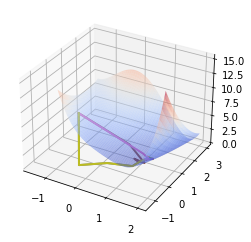

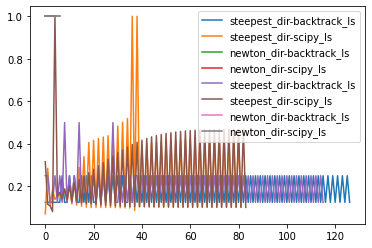

In [5]:
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.gca(projection='3d')
ax2 = fig2.add_subplot(1,1,1)

x = np.linspace(-1.5, 2, 100)
y = np.linspace(0.2, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.vectorize(rosenbrock)(X, Y)

surf = ax1.plot_surface(X, Y, Z, alpha=0.5, cmap=cm.coolwarm)

df = pd.DataFrame(columns=['method', 'iterations', 'solution'])

for x0 in [np.array([1.2, 1.2]), np.array([-1.2, 1])]:
    for p_method in [steepest_dir, newton_dir]:
        for ls_method in [backtrack_ls, scipy_ls]:
            label=f'{p_method.__name__}-{ls_method.__name__}'
            xs, alphas = minimise(rosenbrock_np, grad_rosenbrock_np, hessian_rosenbrock_np,
                x0, search_direction=p_method, line_search = ls_method)
            df = df.append({'method': label, 'iterations': len(alphas), 'solution': xs[-1, :]}, ignore_index=True)
            ax1.plot(xs[:, 0], xs[:, 1], rosenbrock(xs[:, 0], xs[:, 1]), label=label, linewidth=2)
            ax2.plot(alphas, label=label)
    
df = df.set_index('method')
ax2.legend()
plt.show()

In [6]:
df

,iterations,solution
method,,
steepest_dir-backtrack_ls,127,"[1.0000354392317956, 1.0000690223315234]"
steepest_dir-scipy_ls,82,"[1.0000380027669409, 1.0001111211861495]"
newton_dir-backtrack_ls,5,"[1.0000000001827019, 1.00000000004991]"
newton_dir-scipy_ls,5,"[1.0000000001827019, 1.00000000004991]"
steepest_dir-backtrack_ls,116,"[0.999959760830688, 0.9999189172702556]"
steepest_dir-scipy_ls,84,"[1.000033415760566, 1.0000992295119602]"
newton_dir-backtrack_ls,7,"[0.9999989173467589, 0.9999977670981285]"
newton_dir-scipy_ls,7,"[0.9999989173467589, 0.9999977670981285]"
